### 3

1. 이너셔 그래프를 그려서 엘보를 찾는다.
    * 이너셔: 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리
2. 실루엣 점수로 확인
    * 실루엣 점수: 모든 샘플에 대한 실루엣 계수silhouette coefficient의 평균

### 5

1. BIRCH, 병합군집
2. DBSCAN, 평균-이동

### 8

샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델. 밀도 추정과 이상치 탐지에 사용 가능.

### 10



In [59]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [15]:
olivetti

{'DESCR': '.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)

In [16]:
X = olivetti.data
y = olivetti.target

In [33]:
for i,j in strat_split.split(X,y):
	train_valid_idx, test_idx = i,j

In [34]:
print(train_valid_idx, test_idx)

[139  58  34 126 109 202 245 355 112 133  18  96 208 371  17 205 351 323
 361 338 165 339 197  79 237 334 106 366 199 135 156 225 341 123  89   5
  80 349 325 287 340  61  33 315 210 211 384 130  86 121 253 346  53 261
 337 163  47 375 207 356 200  85  36  65  94 304  43 311 181   9 162  95
 258 376 180 386  14 102 392  52 318 249  74 286 144 327 336 251  31 317
 397 326 107 306 189  93  32  87  10 241 313  70 153 227 394 288  71 161
 246 264 204 260 263 393  30 175 168 267 272 296 309 147 322 382 252 360
 387 217 364 342 301 193  28 283  97 298 276 160 132 141 383 242   4 280
 105  44 167 395 381 299 179 257  57  55  92  82  84  15 228 281 290 270
 182 103 195 374   1  98  27 255   0 248 330 269 291 178 262 221 259  11
 275 321  41 125 350 100 353 314 357 305 256  38 236 108 224 297 192  90
 244 113  25  88 373 238 232  19 284 302 111  50 142 155 116  45   8 151
 289 164 172 171 365  23  75 143 279 115 223 329 335  20 331 145 188 184
 396 134 158 362 348 173  66 203  64 380  59 117 37

In [39]:
X_train_valid = X[train_valid_idx]
y_train_valid = y[train_valid_idx]
X_test = X[test_idx]
y_test = y[test_idx]

In [40]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)
for i,j in strat_split.split(X_train_valid,y_train_valid):
	train_idx, valid_idx = i,j

In [41]:
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [42]:
X_train.shape, y_train.shape

((240, 4096), (240,))

In [43]:
X_valid.shape, y_valid.shape

((80, 4096), (80,))

In [44]:
X_test.shape, y_test.shape

((80, 4096), (80,))

In [46]:
from sklearn.cluster import KMeans

k_list = range(5,100,5)
kmeans_list = []
for k in k_list:
     kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
     kmeans_list.append(kmeans)

In [47]:
from sklearn.metrics import silhouette_score
silhouette_score = [silhouette_score(X_train, model.labels_) for model in kmeans_list]

In [49]:
best_score = max(silhouette_score)
best_index = silhouette_score.index(best_score)
best_k = k_list[best_index]

In [50]:
best_k

85

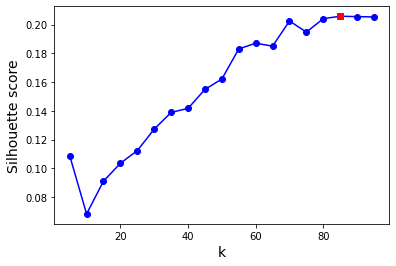

In [56]:
import matplotlib.pyplot as plt

plt.plot(k_list, silhouette_score, 'bo-')
plt.xlabel('k', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

cluster 0


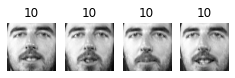

cluster 1


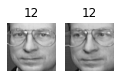

cluster 2


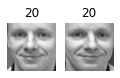

cluster 3


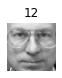

cluster 4


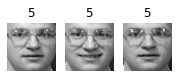

cluster 5


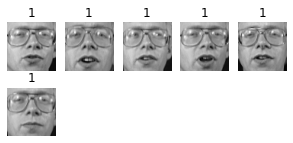

cluster 6


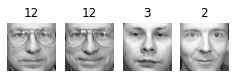

cluster 7


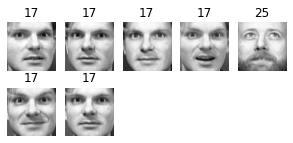

cluster 8


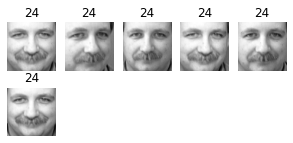

cluster 9


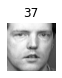

cluster 10


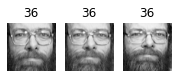

cluster 11


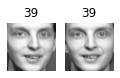

cluster 12


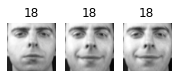

cluster 13


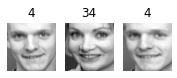

cluster 14


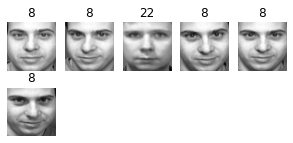

cluster 15


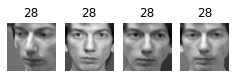

cluster 16


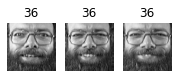

cluster 17


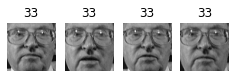

cluster 18


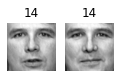

cluster 19


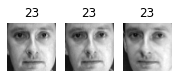

cluster 20


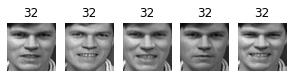

cluster 21


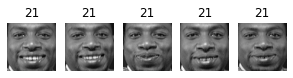

cluster 22


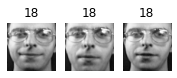

cluster 23


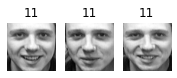

cluster 24


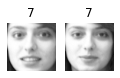

cluster 25


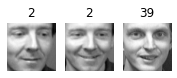

cluster 26


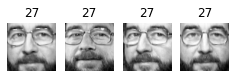

cluster 27


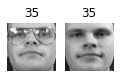

cluster 28


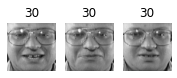

cluster 29


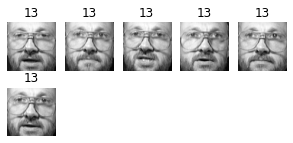

cluster 30


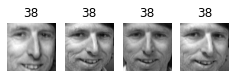

cluster 31


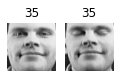

cluster 32


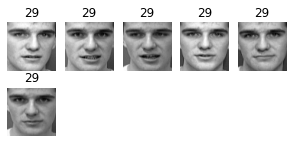

cluster 33


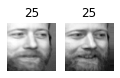

cluster 34


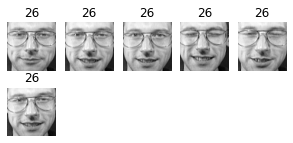

cluster 35


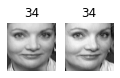

cluster 36


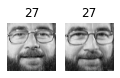

cluster 37


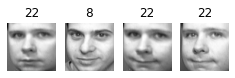

cluster 38


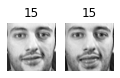

cluster 39


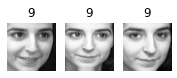

cluster 40


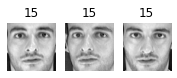

cluster 41


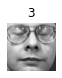

cluster 42


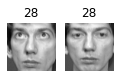

cluster 43


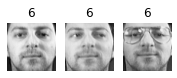

cluster 44


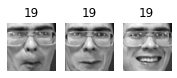

cluster 45


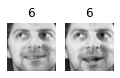

cluster 46


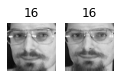

cluster 47


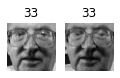

cluster 48


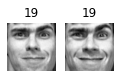

cluster 49


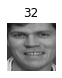

cluster 50


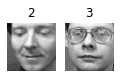

cluster 51


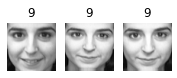

cluster 52


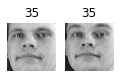

cluster 53


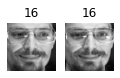

cluster 54


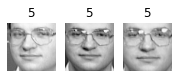

cluster 55


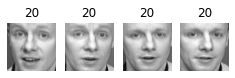

cluster 56


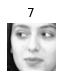

cluster 57


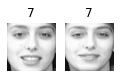

cluster 58


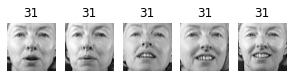

cluster 59


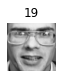

cluster 60


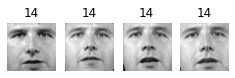

cluster 61


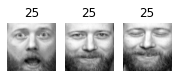

cluster 62


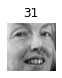

cluster 63


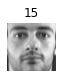

cluster 64


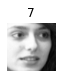

cluster 65


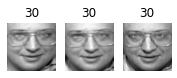

cluster 66


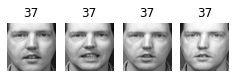

cluster 67


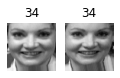

cluster 68


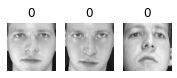

cluster 69


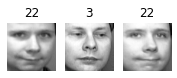

cluster 70


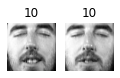

cluster 71


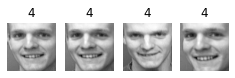

cluster 72


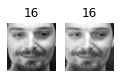

cluster 73


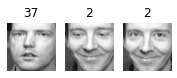

cluster 74


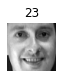

cluster 75


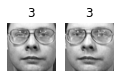

cluster 76


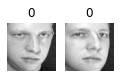

cluster 77


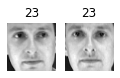

cluster 78


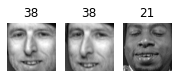

cluster 79


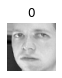

cluster 80


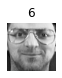

cluster 81


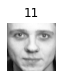

cluster 82


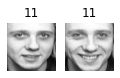

cluster 83


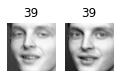

cluster 84


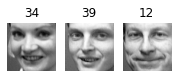

In [58]:
import numpy as np
best_model=kmeans_list[best_index]

def plot_faces(faces,labels,n_cols=5):
  faces=faces.reshape(-1,64,64)
  n_rows=(len(faces)-1) // n_cols+1
  plt.figure(figsize=(n_cols,n_rows * 1.1))
  for index,(face,label) in enumerate(zip(faces,labels)):
    plt.subplot(n_rows,n_cols,index + 1)
    plt.imshow(face,cmap='gray')
    plt.axis('off')
    plt.title(label)
  plt.show()

for cluster_id in np.unique(best_model.labels_):
  print('cluster',cluster_id)
  in_cluster=best_model.labels_ == cluster_id
  faces=X_train[in_cluster]
  labels=y_train[in_cluster]
  plot_faces(faces,labels)
